In [25]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import wfg
import numpy as np
import matplotlib.pyplot as plt
from testsuite.utilities import Pareto_split
from testsuite.analysis_tools import attainment_sample
import matplotlib.patches as patches
from scipy.spatial import KDTree

func = wfg.WFG1

### wfg1_2obj_10dim

In [3]:
try:
    with open('data/wfg1_2obj_10dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg1_2obj_10dim_loaded = True
    print("2D data: loaded")
except FileNotFoundError:
    wfg1_2obj_10dim_loaded = False
    print("2D data: not found")

2D data: loaded


In [4]:
M = 2                                   # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2           # distance related params


n_dim = k+l
n_obj = M

N = 5000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 4
lfactor = 3
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

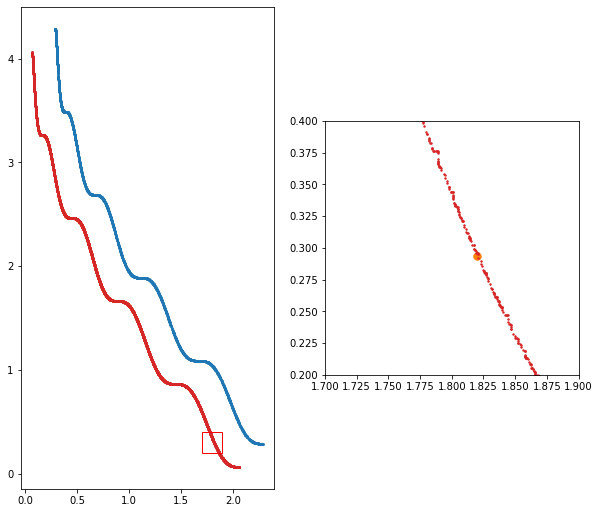

In [5]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.set_aspect('equal')
rect = patches.Rectangle((1.7, 0.2),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.7, 1.9])
ax1.set_ylim([0.2, 0.4])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.set_aspect('equal')
    
if not wfg1_2obj_10dim_loaded:
    offset = -0.224
    ax0.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
    ax1.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
else:
    ax0.scatter(*ya.T, s=2, c="C3")
    ax1.scatter(*ya.T, s=2, c="C3")

In [6]:
if not wfg1_2obj_10dim_loaded:
    ya = attainment_sample(y0+[offset, offset], 5000)

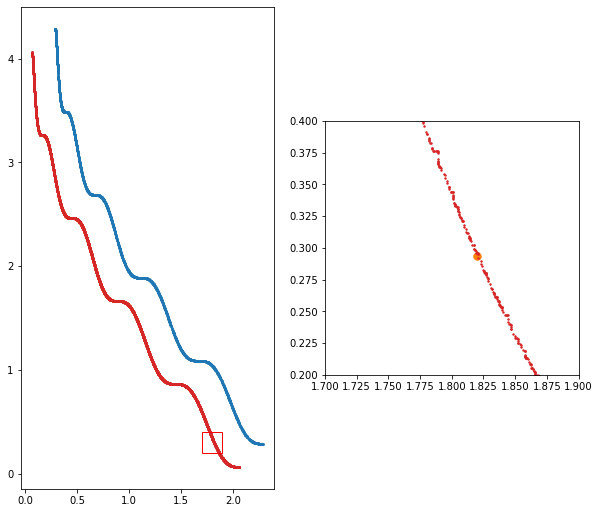

In [8]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.scatter(*ya.T, s=2, c="C3")
ax0.set_aspect('equal')
rect = patches.Rectangle((1.7, 0.2),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.7, 1.9])
ax1.set_ylim([0.2, 0.4])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.scatter(*ya.T, s=2, c="C3")
ax1.set_aspect('equal')

In [9]:
if not wfg1_2obj_10dim_loaded: 
    with open('data/wfg1_2obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, ya)
    print("2D data: saved")

### wfg1_2obj_3dim

In [10]:
try:
    with open('data/wfg1_2obj_3dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg1_2obj_3dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg1_2obj_3dim_loaded = False
    print("Data: not found")

Data: loaded


In [11]:
# sample with k and l factors
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

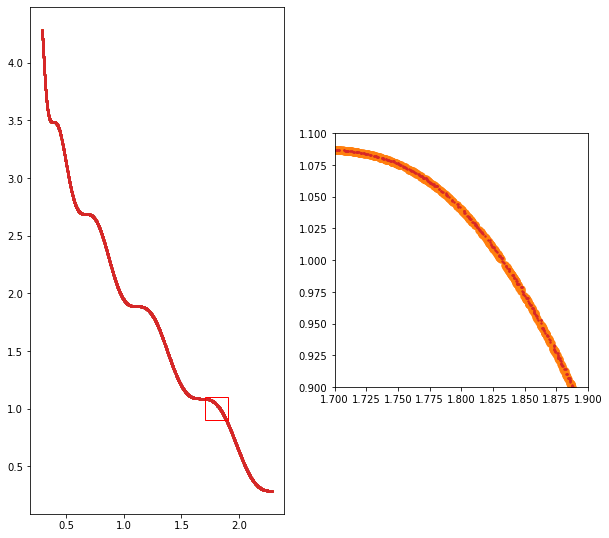

In [12]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.set_aspect('equal')
rect = patches.Rectangle((1.7, 0.9),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.7, 1.9])
ax1.set_ylim([0.9, 1.1])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.set_aspect('equal')
    
if not wfg1_2obj_3dim_loaded:
    offset = 0.0
    ax0.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
    ax1.scatter(*(y0+[offset, offset]).T, s=2, c="C3")
else:
    ax0.scatter(*ya.T, s=2, c="C3")
    ax1.scatter(*ya.T, s=2, c="C3")

In [13]:
if not wfg1_2obj_3dim_loaded:
    ya = attainment_sample(y0+[offset, offset], 5000)

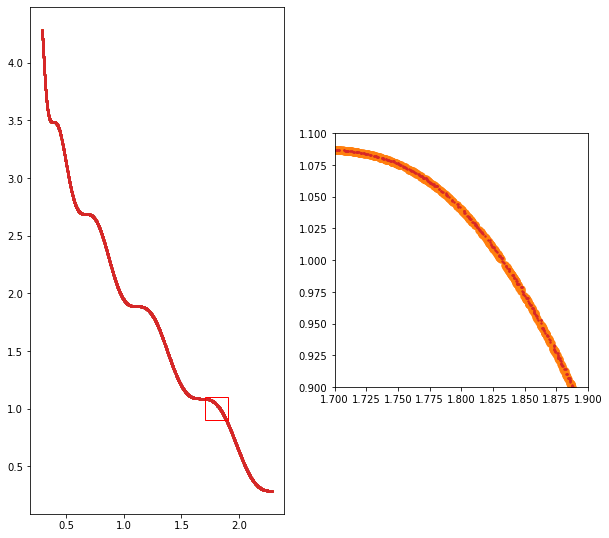

In [14]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.scatter(*ya.T, s=2, c="C3")
ax0.set_aspect('equal')
rect = patches.Rectangle((1.7, 0.9),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)

ax1.set_xlim([1.7, 1.9])
ax1.set_ylim([0.9, 1.1])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.scatter(*ya.T, s=2, c="C3")
ax1.set_aspect('equal')

In [15]:
if not wfg1_2obj_3dim_loaded: 
    with open('data/wfg1_2obj_3dim_refpoints', 'wb') as outfile:
        np.save(outfile, ya)
    print("2D data: saved")

### wfg1_3obj_10dim

In [16]:
try:
    with open('data/wfg1_3obj_10dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg1_3obj_10dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg1_3obj_10dim_loaded = False
    print("Data: not found")

Data: not found


In [17]:
M = 3  # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2   

n_dim = k+l
n_obj = M

N = 50000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 3
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [19]:
%matplotlib qt

In [20]:
diff = y0.min(axis=0) 
diff

array([0.2055566, 0.2055566, 0.2055566])

In [21]:
fig = plt.figure(figsize=[30, 10])
ax0 = fig.add_subplot(231)
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)


ax0.scatter(*(y0-diff)[:, :2].T, c="C0", s=5, alpha=0.1)
ax0.scatter(*y[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*(y0-diff)[:, 1:].T, c="C0", s=5, alpha=0.1)
ax1.scatter(*y[:, 1:].T, c="C1", s=5, alpha=0.3)

ax2.scatter(*(y0-diff)[:, [0,2]].T, c="C0", s=5, alpha=0.1)
ax2.scatter(*y[:, [0,2]].T, c="C1", s=5, alpha=0.3)

In [22]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121, projection='3d') 
ax1 = fig.add_subplot(122, projection='3d') 


ax0.scatter(*(y0-diff).T, c="C1", s=2, alpha=.1)
ax0.scatter(*y.T, c="C0", s=2)

In [ ]:
if not wfg1_3obj_10dim_loaded:
    ya = attainment_sample(y0-diff, 10000)

 11%|█         | 1079/10000 [00:41<05:24, 27.50it/s]

In [31]:
tree0 = KDTree(y)
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y)[0]

In [32]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [00:37,  5.34it/s]


In [35]:
thresh = 0.1
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

In [37]:
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122, projection="3d")

ax0.scatter(*yf_3.T, s=2, c="C0")
ax1.scatter(*y.T, s=2, c="C1")

In [38]:
if not wfg1_3obj_10dim_loaded: 
    with open('data/wfg1_3obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")

2D data: saved


In [25]:
fig = plt.figure(figsize = [10, 10])
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122, projection="3d")
ax0.scatter(*y0.T, c="C0", marker=".", s=5)
ax0.scatter(*y.T, c="C1", marker=".", s=5)
ax0.scatter(*ya.T, s=2, c="C3")
# ax0.set_aspect('equal')
# rect = patches.Rectangle((1.7, 0.9),0.2,0.2,linewidth=1,edgecolor='r',facecolor='none')
# ax0.add_patch(rect)

ax1.set_xlim([1.0, 1.5])
ax1.set_ylim([0., 1.])
ax1.set_ylim([0., 1.])
ax1.scatter(*y0.T, c="C0", marker=".", s=5)
ax1.scatter(*y.T, c="C1", s=55)
ax1.scatter(*ya.T, s=2, c="C3")
# ax1.set_aspect('equal')

### wfg1_3obj_4dim

In [56]:
try:
    with open('data/wfg1_3obj_4dim_refpoints', 'rb') as infile:
        ya = np.load(infile)
    wfg1_3obj_4dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg1_3obj_4dim_loaded = False
    print("Data: not found")

Data: loaded


In [58]:
M = 3  # Number of objectives
N = 50000

# sample with k and l factors
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

ValueError: could not broadcast input array from shape (3) into shape (2)

In [42]:
if not wfg1_3obj_4dim_loaded:
    ya = attainment_sample(y, 10000)

In [43]:
from scipy.spatial import KDTree

In [44]:
tree0 = KDTree(y)
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y)[0]

In [36]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [00:33,  5.93it/s]


In [38]:
thresh = 0.1
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

In [45]:
if not wfg1_3obj_4dim_loaded: 
    with open('data/wfg1_3obj_4dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")
else:
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    ax.scatter(*ya.T, s=5)

### wfg1_4obj_10dim

In [11]:
try:
    with open('data/wfg1_4obj_10dim_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    wfg1_4obj_10dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg1_4obj_10dim_loaded = False
    print("Data: not found")

Data: loaded


In [12]:
M = 4  # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2   

n_dim = k+l
n_obj = M
n_dim2 = k+l

N = 100000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


# sample with k and l factors
kfactor = 3
lfactor = 2
k = kfactor*(M-1)   # position related params
l = lfactor*2       # distance related params

n_dim = k+l
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [13]:
n_dim2

5

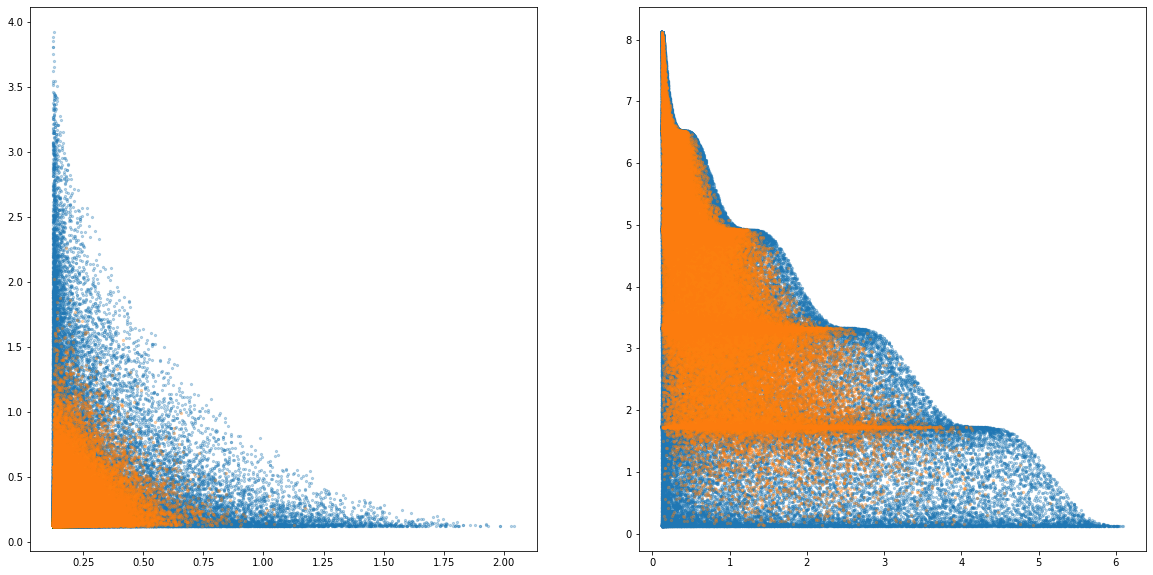

In [14]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*(y0[:, :2]+y.min(axis=0)[:2]).T, c="C0", s=5, alpha=0.3)
ax0.scatter(*y[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*(y0[:, 2:]+[y.min(axis=0)[2], (y.max(axis=0)[3]-y0.max(axis=0)[3])]).T, c="C0", s=5, alpha=0.3)
ax1.scatter(*y[:, 2:].T, c="C1", s=5, alpha=0.3)

In [15]:
adjustment = [*y.min(axis=0)[:3], (y.max(axis=0)[3]-y0.max(axis=0)[3])]
print(adjustment)
adjustment = [0.125, 0.125, 0.125, 0.1]
print(adjustment)

[0.12512441171144043, 0.12512164511709611, 0.12521232530928142, 0.12320878172534488]
[0.125, 0.125, 0.125, 0.1]


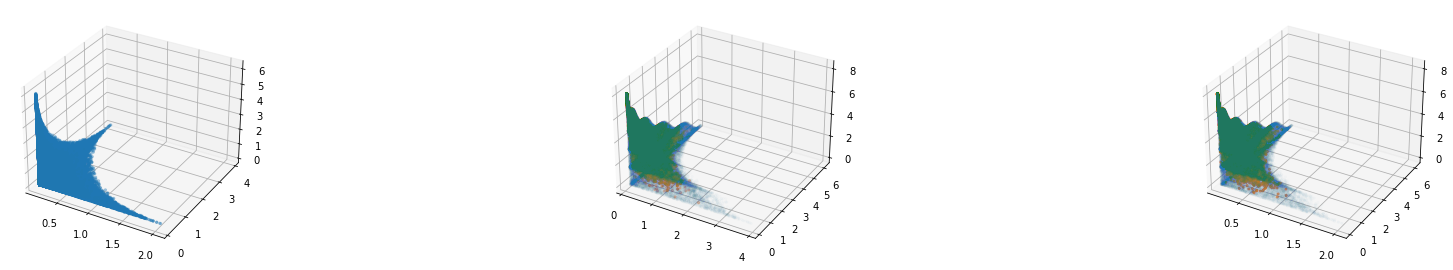

In [17]:
fig = plt.figure(figsize=[30, 10])
ax0 = fig.add_subplot(231, projection="3d")
ax1 = fig.add_subplot(232, projection="3d")
ax2 = fig.add_subplot(233, projection="3d")

ax0.scatter(*(y0+adjustment)[:, :3].T, c="C0", s=5, alpha=0.01)
ax0.scatter(*y[:, :3].T, c="C1", s=5, alpha=0.3)
ax0.scatter(*(y0+adjustment)[:, :3].T, c="C0", s=5, alpha=0.3)

ax1.scatter(*(y0+adjustment)[:, 1:].T, c="C0", s=5, alpha=0.01)
ax1.scatter(*y[:, 1:].T, c="C1", s=5, alpha=0.3)

ax2.scatter(*(y0+adjustment)[:, [0,2,3]].T, c="C0", s=5, alpha=0.01)
ax2.scatter(*y[:, [0,2,3]].T, c="C1", s=5, alpha=0.5)

In [18]:
if not wfg1_4obj_10dim_loaded:
    ya = attainment_sample(y0+adjustment, 200000)

In [92]:
tree0 = KDTree(y)
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y)[0]

In [93]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [02:25,  1.38it/s]


In [94]:
thresh = 0.2
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


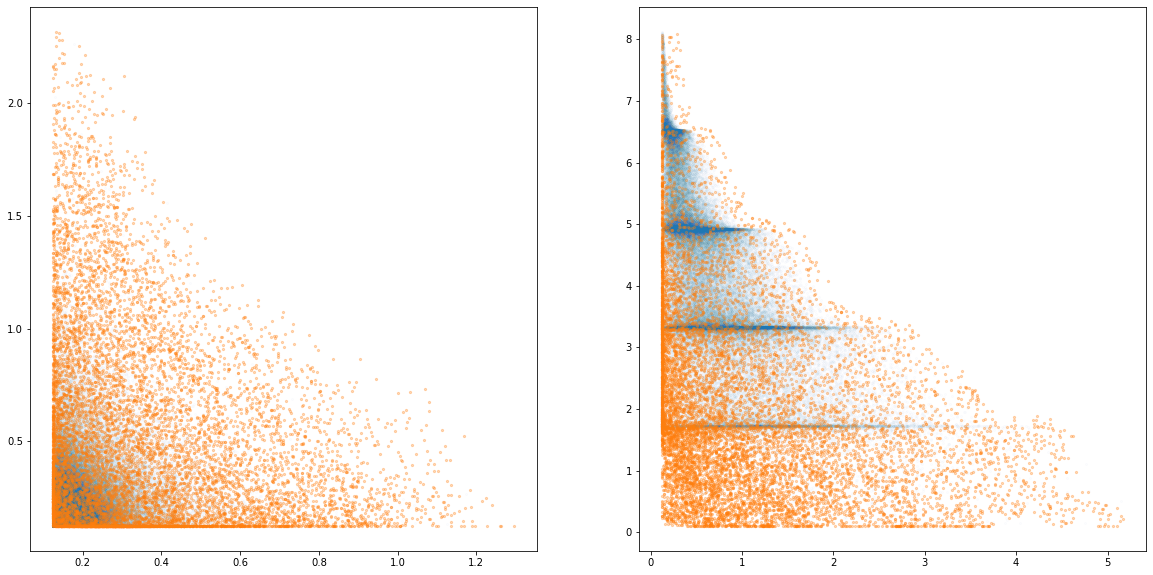

In [20]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*y[:, :2].T, c="C0", s=5, alpha=0.01)
ax0.scatter(*yf_3[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*y[:, 2:].T, c="C0", s=5, alpha=0.01)
ax1.scatter(*yf_3[:, 2:].T, c="C1", s=5, alpha=0.3)

In [19]:
yf_3.shape

(11178, 4)

In [95]:
if not wfg1_4obj_10dim_loaded: 
    with open('data/wfg1_4obj_10dim_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("2D data: saved")

2D data: saved


In [ ]:
with open('data/tmp', 'wb') as outfile:
    np.save(outfile, yf_3)
print("2D data: saved")

### wfg1_4obj_10dim

In [36]:
try:
    with open('data/wfg1_4obj_5dim_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    wfg1_4obj_5dim_loaded = True
    print("Data: loaded")
except FileNotFoundError:
    wfg1_4obj_5dim_loaded = False
    print("Data: not found")

Data: not found


In [22]:
M = 4  # Number of objectives
kfactor = 1
lfactor = 1
k = kfactor*(M-1)   # position related params
l = lfactor*2   

n_dim = k+l
n_obj = M

N = 100000
y0 = np.zeros((N, n_obj))
x0 = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y0[n,:] = func(z, k, M)
    x0[n,:] = z


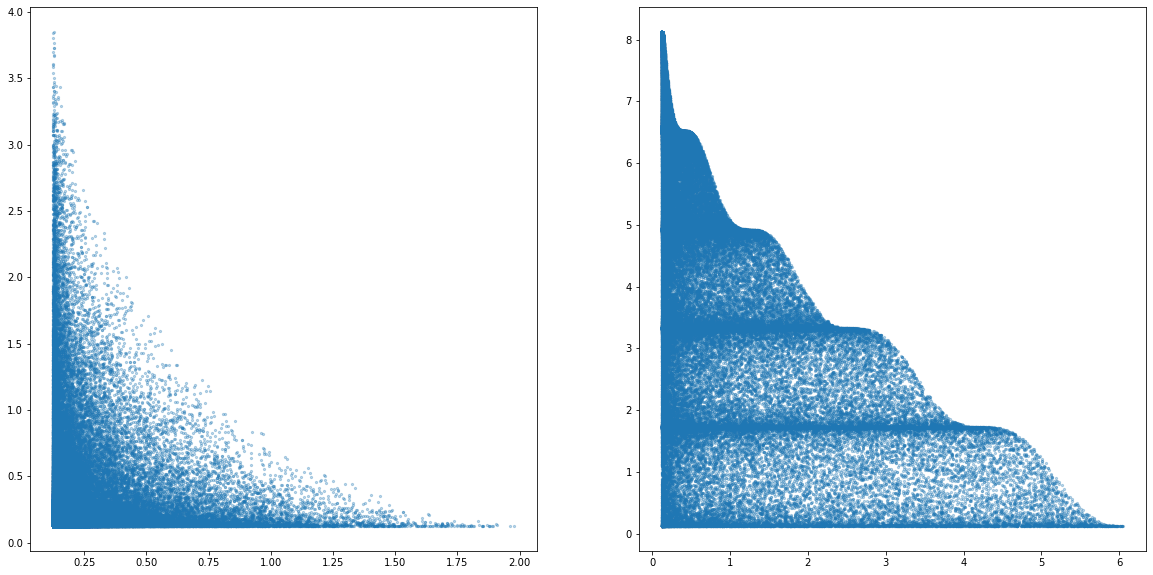

In [23]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*(y0[:, :2]+y.min(axis=0)[:2]).T, c="C0", s=5, alpha=0.3)

ax1.scatter(*(y0[:, 2:]+[y.min(axis=0)[2], (y.max(axis=0)[3]-y0.max(axis=0)[3])]).T, c="C0", s=5, alpha=0.3)

In [24]:
if not wfg1_4obj_5dim_loaded:
    ya = attainment_sample(y0, 200000)

100%|██████████| 200000/200000 [4:06:10<00:00, 13.54it/s]  


In [25]:
tree0 = KDTree(y)
nn0 = tree0.query(ya)[0]

tree1 = KDTree(ya)
nn1 = tree1.query(y)[0]

In [27]:
thresh_plot_0 = np.zeros(200)
thresh_plot_1 = np.zeros(200)
for i, j in tqdm(enumerate(np.linspace(0.01, 0.5, 200))):
    thresh_plot_0[i] = sum(nn0<j)
    thresh_plot_1[i] = sum(nn1<j)

200it [02:20,  1.43it/s]


/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


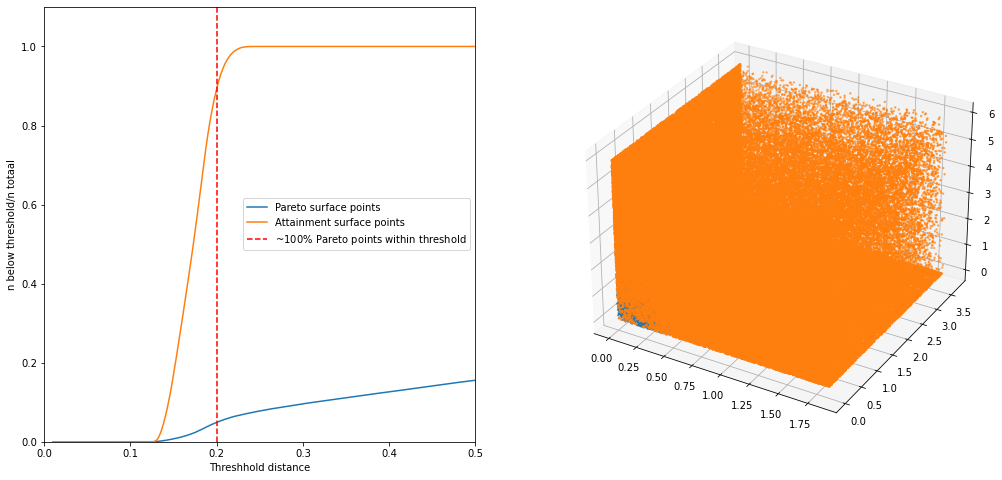

In [28]:
thresh = 0.2
      
fig = plt.figure(figsize=[17, 8])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection="3d")

yf_3 = ya[nn0<thresh]

ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(nn0), label="Pareto surface points")
ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(nn1), label="Attainment surface points")
ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
ax0.set_xlabel("Threshhold distance")
ax0.set_ylabel("n below threshold/n totaal")
ax0.set_xlim([0, 0.5])
ax0.set_ylim([0, 1.1])
ax0.legend()

ax1.scatter(*yf_3.T, s=2, c="C0", label="nn distance<threshold")
ax1.scatter(*ya[nn0>thresh, :3].T, s=2, c="C1", label="nn distance>threshold")

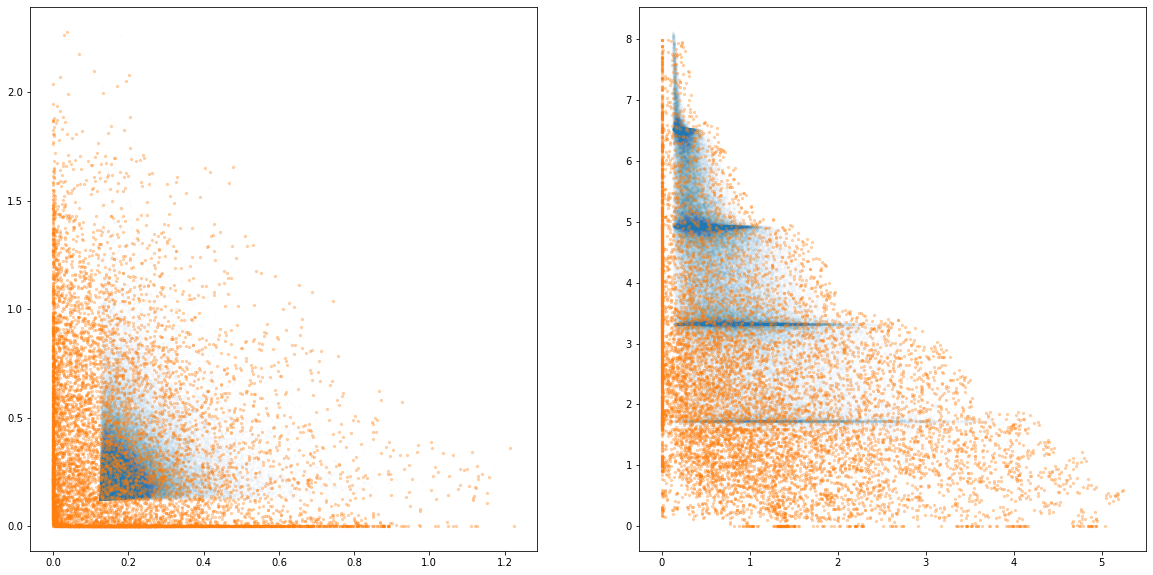

In [29]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*y[:, :2].T, c="C0", s=5, alpha=0.01)
ax0.scatter(*yf_3[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*y[:, 2:].T, c="C0", s=5, alpha=0.01)
ax1.scatter(*yf_3[:, 2:].T, c="C1", s=5, alpha=0.3)

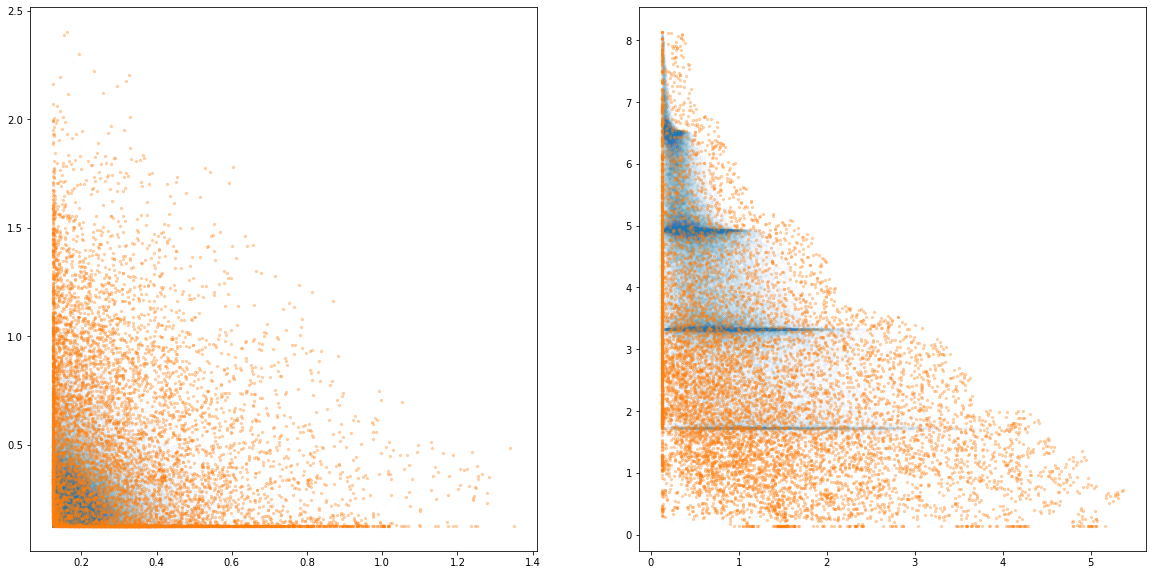

In [32]:
fig = plt.figure(figsize=[20, 10])
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.scatter(*y[:, :2].T, c="C0", s=5, alpha=0.01)
ax0.scatter(*(yf_3+y.min(axis=0))[:, :2].T, c="C1", s=5, alpha=0.3)

ax1.scatter(*y[:, 2:].T, c="C0", s=5, alpha=0.01)
ax1.scatter(*(yf_3+y.min(axis=0))[:, 2:].T, c="C1", s=5, alpha=0.3)

In [85]:
yf_3.shape

(1706, 4)

In [37]:
yf_3_adjusted = yf_3+y.min(axis=0)

In [38]:
if not wfg1_4obj_5dim_loaded: 
    with open('data/wfg1_4obj_5dim_loaded_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3_adjusted)
    print("2D data: saved")

2D data: saved
